# Manipulating and Visualizing Data with Pandas

In [54]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import JSON
import json
import matplotlib.pyplot as plt

## creating & Manipulating DataFrames

In [35]:
df = pd.DataFrame([
    [1,4,8,9], 
    [3,7,2,1], 
    [3,5,1,4], 
    [0,1,2,3]
])
print(df.shape)
print(len(df.index))
print(df.head())

(4, 4)
4
   0  1  2  3
0  1  4  8  9
1  3  7  2  1
2  3  5  1  4
3  0  1  2  3


In [34]:
s_1 = pd.Series([1,5,4,9,2,2,1,])
print(s_1)
print(s_1.to_string(index=False))

0    1
1    5
2    4
3    9
4    2
5    2
6    1
dtype: int64
1
5
4
9
2
2
1


In [50]:
url = r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)
titanic_data.head()
json1_str = titanic_data.to_json()
json1_data = json.loads(json1_str)
# JSON({'a': [1, 2, 3, 4,], 'b': {'inner1': 'helloworld', 'inner2': 'foobar'}})
JSON(json1_data)

<IPython.core.display.JSON object>

## Selecting DataFrame Components

In [53]:
array_1 = np.array([[4,6,9,2], [3,5,9,0]])
new_df = pd.DataFrame(array_1)
indices = new_df.iloc[0:1]      #iloc - slice by DF row index
print(indices)

series = pd.Series({
    "Fruit 1": "Apple",
    "Fruit 2": "Orange",
    "Fruit 3": "Mango",
    "Fruit 4": "Kiwi",
})
print(series.loc[["Fruit 1"]])  #loc - slice by dict key string

   0  1  2  3
0  4  6  9  2
Fruit 1    Apple
dtype: object


## Adding Rows, Columns, Indices

In [66]:
array_1 = np.array([['A','B','C','D'], ['E','F','G','H']])
new_df = pd.DataFrame(array_1) #DF from 2D array
new_df.set_index(1)

,0,2,3
1,,,
B,A,C,D
F,E,G,H


In [67]:
# add rows
new_df.loc[2] = ['J','K','L','M']
new_df.loc[3] = ['N','O','P','Q']
# add column
new_df.loc[:,4] = pd.Series(['R','S','T','U'])
print(new_df.head())

   0  1  2  3  4
0  A  B  C  D  R
1  E  F  G  H  S
2  J  K  L  M  T
3  N  O  P  Q  U


## Deleting Rows and Columns

In [68]:
new_df.drop(1, axis=1, inplace=True)
# or create a new DF (inplace=False)
new_df.drop(new_df.columns[[1]], axis=1)
print(new_df.head())

   0  2  3  4
0  A  C  D  R
1  E  G  H  S
2  J  L  M  T
3  N  P  Q  U


## Renaming and Resetting

In [69]:
# rename rows
new_df.rename({3:"Z"}, inplace=True)
# rename columns
new_df.rename(columns={2:"Y"})

,0,Y,3,4
0,A,C,D,R
1,E,G,H,S
2,J,L,M,T
Z,N,P,Q,U


## Reshaping DataFrames

In [71]:
new_df = pd.DataFrame(
    [[1,2],[3,4]],
    index=['apple','pear'],
    columns=['weight','price']
)
print(new_df.head())
new_df = new_df.stack()
print(new_df.head())
new_df = new_df.unstack()


       weight  price
apple       1      2
pear        3      4
apple  weight    1
       price     2
pear   weight    3
       price     4
dtype: int64


## iterating DataFrame Rows

In [73]:
for idx, row in new_df.iterrows():
    print(row['weight'], row['price'])

1 2
3 4


# Visualization with Pandas

In [56]:
vg_data = pd.read_csv("../data/vgsales.csv") #from www.kaggle.com/sidtwr/videogame-sales-dataset
print(vg_data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## Bar Charts

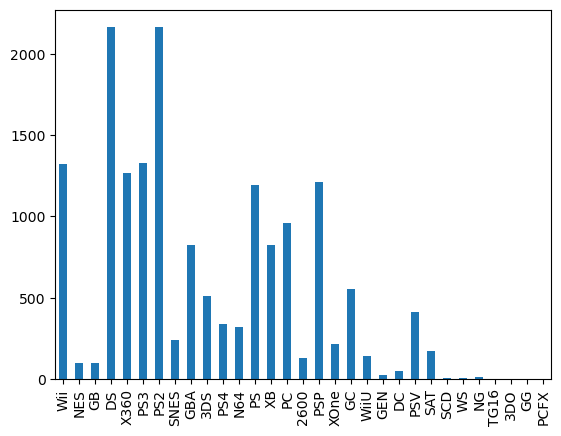

In [57]:
platforms = vg_data['Platform']
sub_frame = vg_data[['NA_Sales', 'EU_Sales', 'Other_Sales']]
platforms.value_counts(sort=False).plot.bar()
plt.show()

## Histograms

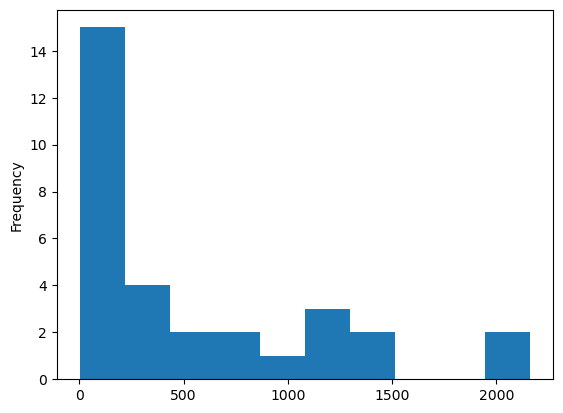

In [74]:
platforms.value_counts(sort=False).plot.hist(orientation='vertical')
plt.show()

## Pie Charts

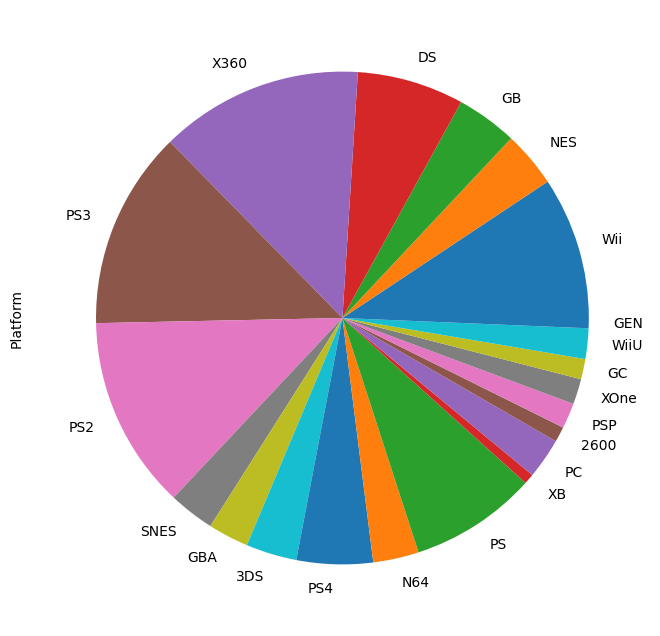

In [75]:
platforms = vg_data['Platform'].head(300)
platforms.value_counts(sort=False).plot.pie(figsize=(8,8))
plt.show()

## Density Plots

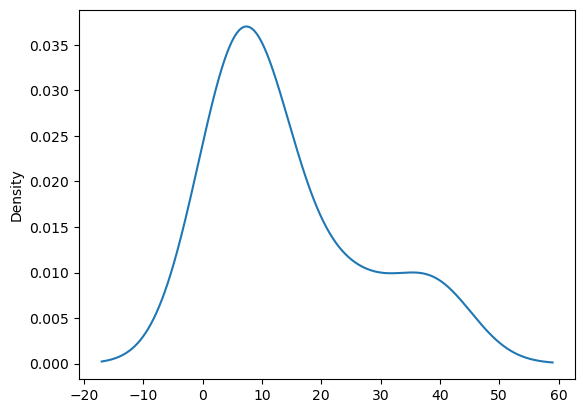

In [76]:
year = vg_data['Year'].head(200)
platforms.value_counts(sort=False).plot.kde()
plt.show()

## Scatter Matrices

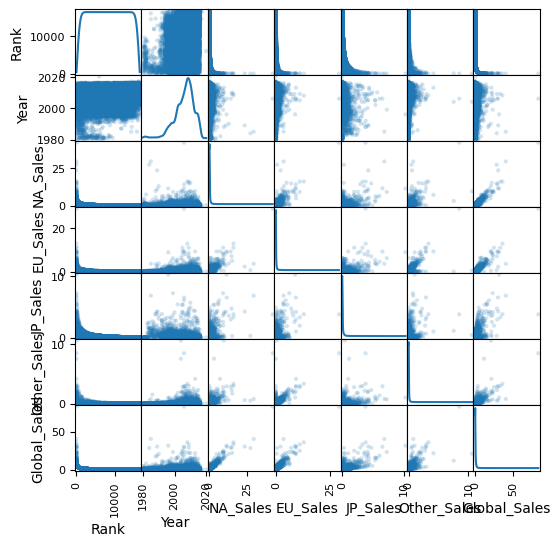

In [77]:
from pandas.plotting import scatter_matrix
scatter_matrix(vg_data, alpha=0.2, figsize=(6,6), diagonal='kde')
plt.show()

## Bootstrap Plot

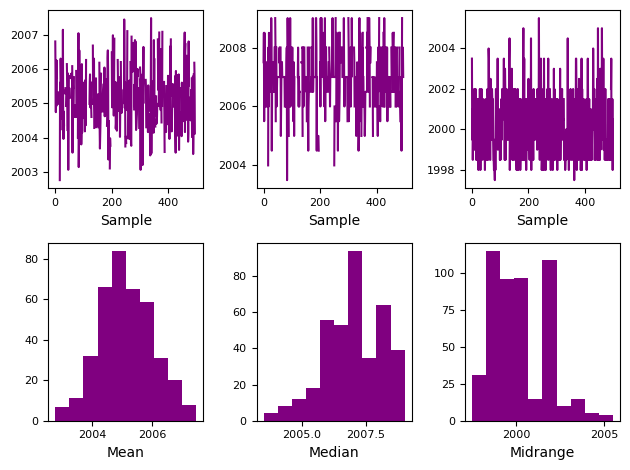

In [79]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(year, size=50, samples=500, color='purple')
plt.show()